# CSE480: Machine Vision — Lab Assignment #06 (Task 1)

## What we do in this lab
In this lab, we use **Scikit-Learn** to build a simple **digit recognition** pipeline using the built-in **Digits dataset**.

### Required steps (Task 1)
1. **Load** the digits dataset (`sklearn.datasets.load_digits`).
2. **Visualize** the first **50 images** in a grid (like the provided example).
3. **Split** into train/test with:
   - `test_size = 0.25`
   - `random_state = 42`
4. Apply **standardization** correctly:
   - Fit the scaler on **training data only**
   - Transform both train and test
5. Train **k-Nearest Neighbors (k-NN)** with **k = 3**
6. Report the **test accuracy**

The digits images are **8×8 grayscale**, and Scikit-Learn provides them both as:
- `digits.images` (8×8 images)
- `digits.data` (flattened vectors of length 64 for classification)


## 1) Install / Imports

In [6]:
!pip -q install scikit-learn matplotlib

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


## 2) Load the Digits dataset

In [8]:
digits = load_digits()

print("Dataset keys:", digits.keys())
print("digits.data shape:", digits.data.shape)      # (n_samples, 64)
print("digits.images shape:", digits.images.shape)  # (n_samples, 8, 8)
print("digits.target shape:", digits.target.shape)  # (n_samples,)


Dataset keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
digits.data shape: (1797, 64)
digits.images shape: (1797, 8, 8)
digits.target shape: (1797,)


## 3) Show the first 50 images (5 × 10 grid)

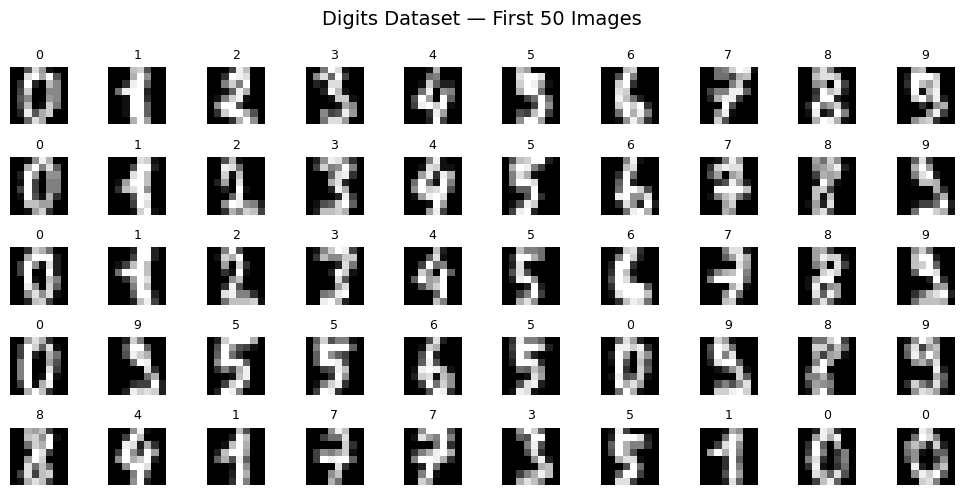

In [9]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
axes = axes.ravel()

for i in range(50):
    # Hint from the sheet: digits.data[i].reshape(8, 8)
    axes[i].imshow(digits.data[i].reshape(8, 8), cmap="gray")
    axes[i].set_title(str(digits.target[i]), fontsize=9)
    axes[i].axis("off")

plt.suptitle("Digits Dataset — First 50 Images", fontsize=14)
plt.tight_layout()
plt.show()


## 4) Train/Test split + Standardization + k-NN (k=3)

### Important note (correct standardization)
We must **fit** the `StandardScaler` on **training data only** to avoid data leakage:
- `scaler.fit_transform(X_train)`
- `scaler.transform(X_test)`


In [10]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy (k=3): {acc:.4f}")


Test Accuracy (k=3): 0.9667


## Conclusion
- We loaded the digits dataset.
- We visualized the first 50 digits.
- We trained a standardized k-NN classifier with **k=3**.
- We reported the final **test accuracy** as required.
